In [2]:
!pip install xgboost

In [29]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [66]:
data = pd.read_csv('dataset_v2.csv')

In [67]:
# data_neg = data.loc[data['status']==0]
# data_pos = data.loc[data['status']==1]
# data_pos2 = data_pos.sample(n=401,random_state=1)

# X_test = shuffle(pd.concat([data_neg, data_pos2]))
# Y_test = X_test['status']
# X_test = X_test.drop(columns=['status'])


In [68]:
# data = pd.read_csv('dataset_v2.csv')

Y_data = data['status']
X_data = data.drop(columns=['status'])
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data, test_size = 0.3)
X_train

,employee_count,facebook_url,linkedin_url,twitter_url,AFG,AGO,ALB,ARE,ARG,ARM,...,num_mba_1hot_4,num_top20_1hot_2,num_top20_1hot_4,num_top20_1hot_4+,num_top50_1hot_2,num_top50_1hot_4,num_top50_1hot_4+,num_top100_1hot_2,num_top100_1hot_4,num_top100_1hot_4+
482,0,1,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2550,0,1,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
21100,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1237,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
20861,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1,1,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
22067,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
25158,0,1,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
20272,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [69]:
print(y_test.value_counts())
print(y_train.value_counts())

1    5669
0    2230
Name: status, dtype: int64
1    13209
0     5219
Name: status, dtype: int64


In [70]:
model = XGBClassifier()
model.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.86%


In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
c = confusion_matrix(y_test, y_pred)
c

array([[ 821, 1410],
       [ 503, 5165]], dtype=int64)

In [54]:
c = confusion_matrix(y_test, y_pred)
c

array([[ 774, 1401],
       [ 506, 5218]], dtype=int64)

In [44]:
c

array([[ 824, 1401],
       [ 504, 5170]], dtype=int64)

In [45]:
def metrics(c):
    tp = c[1, 1]
    tn = c[0, 0]
    fp = c[0, 1]
    fn = c[1, 0]
    prec = tp / (tp + fp) if(tp + fp > 0) else 0
    recl = tp / (tp + fn) if(tp + fn > 0) else 0
    f1 = 2 * tp/ (2 * tp + fp + fn) 
    return prec, recl, f1

In [65]:
metrics(c)

(0.785551330798479, 0.9112561750176429, 0.8437474475210325)

In [55]:
metrics(c)

(0.788336606738178, 0.9116002795248078, 0.8454994733857247)

In [31]:
c[0, 0] + c[0, 1]

246

In [32]:
c[1, 0] + c[1, 1]

2973

In [33]:
2973 + 246

3219

In [34]:
acc_  = 2973 / 3219

In [35]:
acc_

0.923578751164958

In [36]:
prec_ = 2973 / 3219

In [ ]:
recl_ = 1

In [27]:
prec = c[1, 1] / (c[0, 1] + c[1, 1])
recl = c[1, 1] / (c[1, 0] + c[1, 1])
f1 = 2 * prec * recl / (prec + recl)

In [29]:
prec

0.9244929797191888

In [30]:
recl

0.996636394214598

In [28]:
f1

0.9592101003561023

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


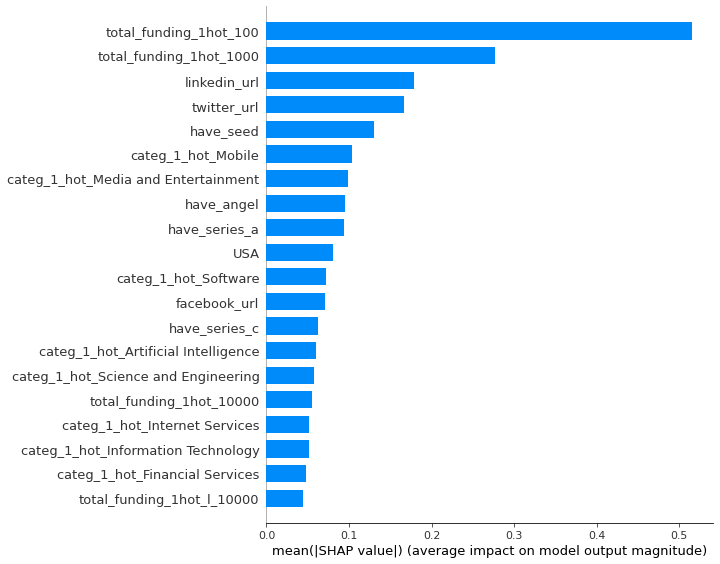

In [56]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

Text(0.5, 0, 'Xgboost Feature Importance')

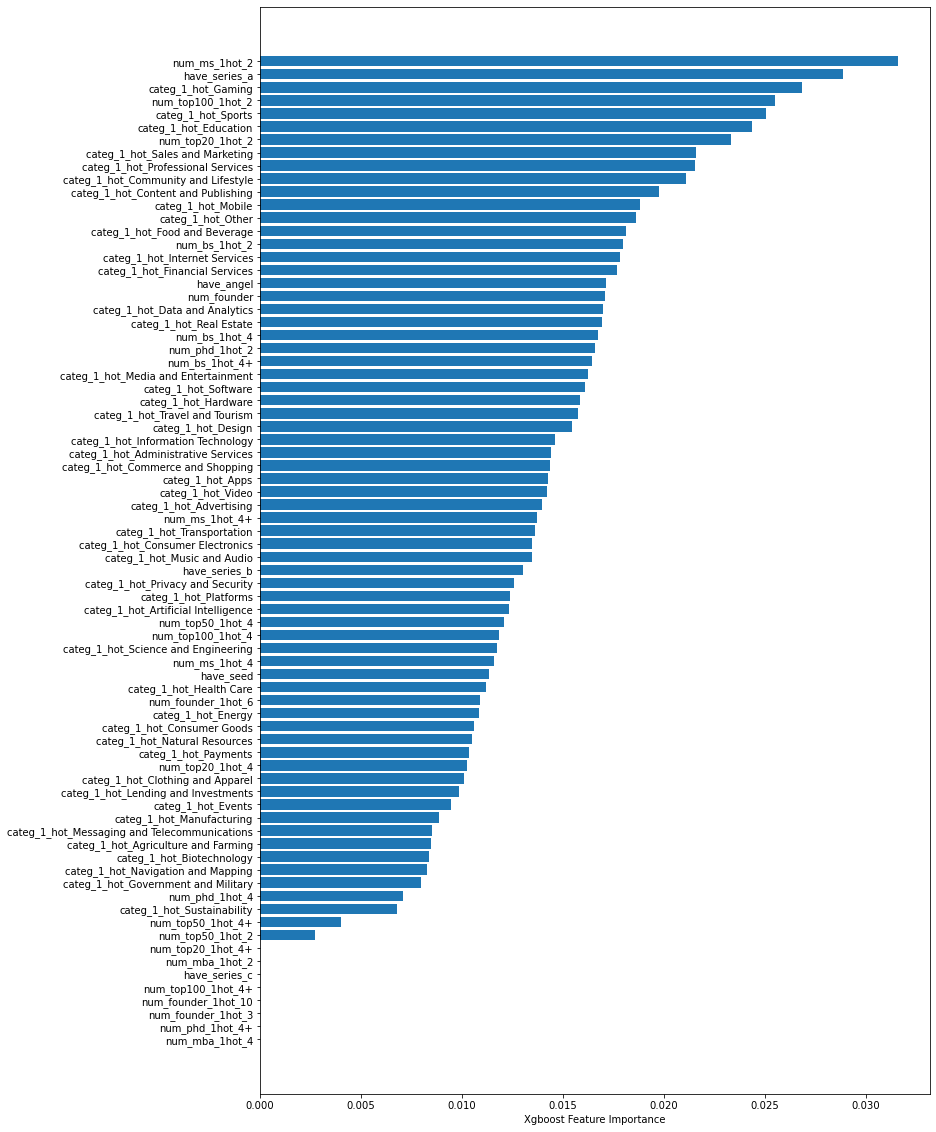

In [19]:
import matplotlib.pyplot as plt
x_names = X_train.columns.values.tolist()
sorted_idx = model.feature_importances_.argsort()
# print( X_train.columns.values[sorted_idx])
fig,ax1 = plt.subplots(figsize=(12,20))
plt.barh( X_train.columns.values[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")